In [19]:
#Environment set up
%pip install pandas
%pip install matplotlib
%pip install scikit-learn



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl.metadata (11 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.6 kB 1.3 MB/s eta 0:00:01
     -------------------- ------------------- 30.7/60.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 292.7 kB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl (10.6 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
   ---------------------------------------- 0.0/45.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/45.9 MB 1.6 MB/s eta 0:00:30
   ---------------------------------------- 0.1/45.9 MB 1

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [21]:

data = pd.read_csv('Data_Sources/Paitients_Files_Train.csv')
data. head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [22]:
#renaming the columns.
data = data.rename(columns={'ID': 'PatientID' , 'PRG' : 'PlasmaGlucose', 'PL' : 'BloodWorkResult-1', 'PR' : 'BloodPressure', 'SK': 'Blood Work Result-2', 'TS' : 'Blood Work Result-3', 'M11' : 'BMI', 'BD2' : 'Blood Work Result-4', 'Sepssis': 'Sepsis'})

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PatientID            599 non-null    object 
 1   PlasmaGlucose        599 non-null    int64  
 2   BloodWorkResult-1    599 non-null    int64  
 3   BloodPressure        599 non-null    int64  
 4   Blood Work Result-2  599 non-null    int64  
 5   Blood Work Result-3  599 non-null    int64  
 6   BMI                  599 non-null    float64
 7   Blood Work Result-4  599 non-null    float64
 8   Age                  599 non-null    int64  
 9   Insurance            599 non-null    int64  
 10  Sepsis               599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


There are no null values in this dataset.

In [24]:
data.shape

(599, 11)

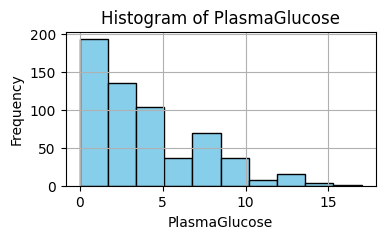

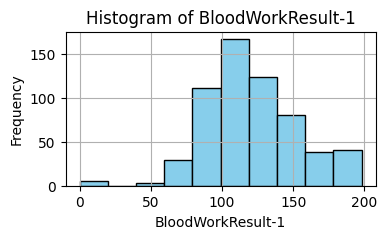

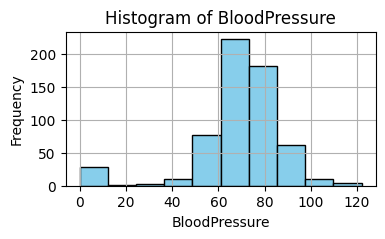

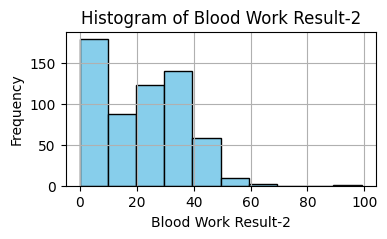

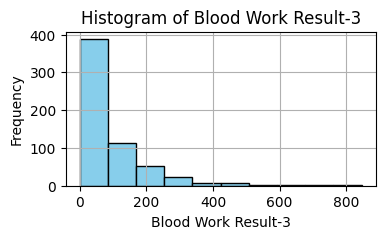

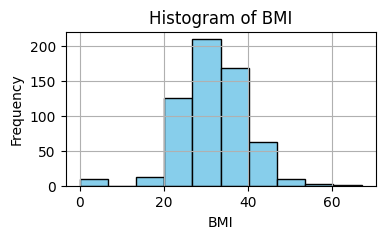

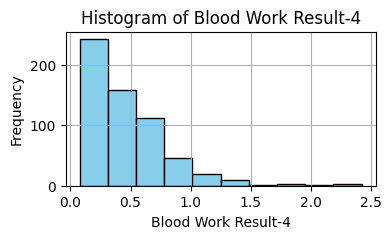

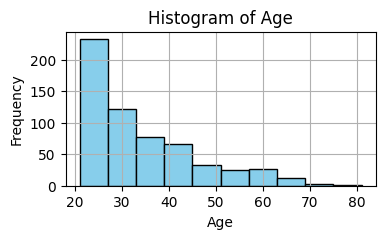

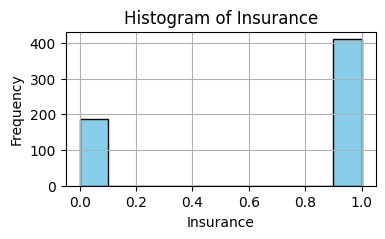

In [25]:
df = pd.DataFrame(data)
# Selecting only numerical columns for histogram
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Plotting histograms for each numerical column
for column in numeric_columns:
    plt.figure(figsize=(4, 2))
    plt.hist(df[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Model Building.


In [27]:
df = pd.DataFrame(data)

# Split features and target
X = df.drop(columns=['PatientID', 'Sepsis'])
y = df['Sepsis'].map({'Positive': 1, 'Negative': 0})

In [30]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label_encoder', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('label_encoder', LabelEncoder())
    ]))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full pipeline with preprocessing and model for Logistic Regression
full_pipeline_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Full pipeline with preprocessing and model for Random Forest Classifier
full_pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Full pipeline with preprocessing and model for Support Vector Machine (SVM)
full_pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

In [35]:
# Fit the pipelines (including preprocessing) to the training data
full_pipeline_logreg.fit(X_train, y_train)
full_pipeline_rf.fit(X_train, y_train)
full_pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['PlasmaGlucose', 'BloodWorkResult-1', 'BloodPressure',
       'Blood Work Result-2', 'Blood Work Result-3', 'BMI',
       'Blood Work Result-4', 'Age', 'Insurance'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('label_encoder',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(fill_value='missing',
                                                                                                  strategy='constant')),
                                                                                   ('label_encoder',
                                                                                    LabelEncoder())]))]),
                                                  Index([], dtype='object'))])),
                ('classifier', SVC())])

In [36]:
# Predict on the testing set for all models
y_pred_logreg = full_pipeline_logreg.predict(X_test)
y_pred_rf = full_pipeline_rf.predict(X_test)
y_pred_svm = full_pipeline_svm.predict(X_test)

In [37]:
# Evaluate the models
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

# Print the scores for comparison
print("Logistic Regression Model:")
print("Accuracy:", accuracy_logreg)
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)
print(classification_report(y_test, y_pred_logreg))

print("\nRandom Forest Classifier Model:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print(classification_report(y_test, y_pred_rf))

print("\nSVM Model:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print(classification_report(y_test, y_pred_svm))

Logistic Regression Model:
Accuracy: 0.7416666666666667
Precision: 0.6578947368421053
Recall: 0.5813953488372093
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        77
           1       0.66      0.58      0.62        43

    accuracy                           0.74       120
   macro avg       0.72      0.71      0.71       120
weighted avg       0.74      0.74      0.74       120


Random Forest Classifier Model:
Accuracy: 0.7416666666666667
Precision: 0.6363636363636364
Recall: 0.6511627906976745
              precision    recall  f1-score   support

           0       0.80      0.79      0.80        77
           1       0.64      0.65      0.64        43

    accuracy                           0.74       120
   macro avg       0.72      0.72      0.72       120
weighted avg       0.74      0.74      0.74       120


SVM Model:
Accuracy: 0.7333333333333333
Precision: 0.6341463414634146
Recall: 0.6046511627906976
              pr